In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

merged_data_Ablock = pd.read_csv('data-model-consumoA-60T.csv', delimiter=';')

print(merged_data_Ablock.head(20))


    Unnamed: 0                       Date  dif_cons_real  cons_total  \
0            0  2021-01-05 07:00:00+00:00           7.12      152.14   
1            1  2021-01-05 08:00:00+00:00           5.92      158.06   
2            2  2021-01-05 09:00:00+00:00           6.69      164.75   
3            3  2021-01-05 11:00:00+00:00           3.14      169.14   
4            4  2021-01-07 09:00:00+00:00           6.08      237.89   
5            5  2021-01-07 10:00:00+00:00          12.08      249.97   
6            6  2021-01-07 11:00:00+00:00           7.72      257.69   
7            7  2021-01-07 12:00:00+00:00           7.97      265.66   
8            8  2021-01-07 13:00:00+00:00           5.25      270.91   
9            9  2021-01-08 10:00:00+00:00           4.09      336.62   
10          10  2021-01-08 11:00:00+00:00           5.16      341.78   
11          11  2021-01-11 08:00:00+00:00           7.94      440.78   
12          12  2021-01-11 09:00:00+00:00          10.50      45

In [ ]:
print(merged_data_Ablock.columns)

Index(['Unnamed: 0', 'Date', 'dif_cons_real', 'cons_total', 'dif_cons_smooth',
       'V2', 'V4', 'V12', 'V26', 'V5_0', 'V5_1', 'V5_2', 'Hour_1', 'Hour_2',
       'Hour_3', 'Season_1', 'Season_2', 'Season_3', 'Season_4', 'tmed',
       'hrmed', 'radmed', 'vvmed', 'dvmed', 'prec', 'dewpt', 'dpv'],
      dtype='object')


In [ ]:
columns_to_drop = ['Unnamed: 0', 'dif_cons_real', 'cons_total', 'radmed', 'vvmed', 'dvmed', 'dewpt', 'dpv']
merged_data_Ablock.drop(columns=columns_to_drop, inplace=True)

# 2. Rename the columns appropriately
merged_data_Ablock.rename(columns={
    'V2': 'temperature_C',          # Rename V2 to temperature in °C
    'V4': 'no._of_on_HVAC',             # Rename V4 to state of the HVAC (0 or 1)
    'V12': 'setpoint_temperature',  # Rename V12 to setpoint temperature established by the user
    'V26': 'device_type',           # Rename V26 to device type (wall/ceiling)
    'V5_0': 'operation_off',        # Rename V5_0 to operation off
    'V5_1': 'operation_heat',       # Rename V5_1 to operation heat
    'V5_2': 'operation_cold'        # Rename V5_2 to operation cold
}, inplace=True)

# 3. Filter the data where Season_4 == 1 and Hour_1 == 1
filtered_df = merged_data_Ablock[(merged_data_Ablock['Season_3'] == 1) & (merged_data_Ablock['Hour_1'] == 1)]

# Display the filtered and modified dataframe
print(filtered_df.head())

                           Date  dif_cons_smooth  temperature_C  \
3696  2021-07-01 06:00:00+00:00             6.55      30.290732   
3697  2021-07-01 07:00:00+00:00             7.28      30.405854   
3698  2021-07-01 08:00:00+00:00             9.29      30.470000   
3699  2021-07-01 09:00:00+00:00            10.64      30.484634   
3700  2021-07-01 10:00:00+00:00            11.72      30.600488   

      no._of_on_HVAC  setpoint_temperature  device_type  operation_off  \
3696             9.0                 18.10          0.4            0.0   
3697             9.0                 18.08          0.4            0.0   
3698            10.0                 18.08          0.5            0.0   
3699            11.0                 18.08          0.5            0.0   
3700            11.0                 17.73          0.5            0.0   

      operation_heat  operation_cold  Hour_1  Hour_2  Hour_3  Season_1  \
3696             0.0             1.0     1.0     0.0     0.0       0.0   
3697

In [ ]:
columns_to_drop = ['Hour_1', 'Hour_2','Hour_3', 'Season_1', 'Season_2', 'Season_3', 'Season_4']
filtered_df.drop(columns=columns_to_drop, inplace=True)

filtered_df.rename(columns={
    'tmed' : 'temperature',
    'hrmed' : 'humidity',
    'prec' : 'precipitation'
}, inplace=True)
print(filtered_df.head())
newdf = filtered_df.copy()

                           Date  dif_cons_smooth  temperature_C  \
3696  2021-07-01 06:00:00+00:00             6.55      30.290732   
3697  2021-07-01 07:00:00+00:00             7.28      30.405854   
3698  2021-07-01 08:00:00+00:00             9.29      30.470000   
3699  2021-07-01 09:00:00+00:00            10.64      30.484634   
3700  2021-07-01 10:00:00+00:00            11.72      30.600488   

      no._of_on_HVAC  setpoint_temperature  device_type  operation_off  \
3696             9.0                 18.10          0.4            0.0   
3697             9.0                 18.08          0.4            0.0   
3698            10.0                 18.08          0.5            0.0   
3699            11.0                 18.08          0.5            0.0   
3700            11.0                 17.73          0.5            0.0   

      operation_heat  operation_cold  temperature  humidity  precipitation  
3696             0.0             1.0         22.4      76.4            0.0 

<ipython-input-16-6905916a46bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, inplace=True)
<ipython-input-16-6905916a46bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={


In [ ]:
filtered_df.reset_index(drop=True, inplace=True)  # This drops the old index
filtered_df.index = filtered_df.index + 1         # Shift the index to start from 1
filtered_df = filtered_df.drop(columns=['device_type'])
filtered_df.rename(columns={'dif_cons_smooth': 'consumption_in_one-hour'}, inplace=True)
# Display the first few rows to confirm
print(filtered_df.head())

                        Date  consumption_in_one-hour  temperature_C  \
1  2021-07-01 06:00:00+00:00                     6.55      30.290732   
2  2021-07-01 07:00:00+00:00                     7.28      30.405854   
3  2021-07-01 08:00:00+00:00                     9.29      30.470000   
4  2021-07-01 09:00:00+00:00                    10.64      30.484634   
5  2021-07-01 10:00:00+00:00                    11.72      30.600488   

   no._of_on_HVAC  setpoint_temperature  operation_off  operation_heat  \
1             9.0                 18.10            0.0             0.0   
2             9.0                 18.08            0.0             0.0   
3            10.0                 18.08            0.0             0.0   
4            11.0                 18.08            0.0             0.0   
5            11.0                 17.73            0.0             0.0   

   operation_cold  temperature  humidity  precipitation  
1             1.0         22.4      76.4            0.0  
2     

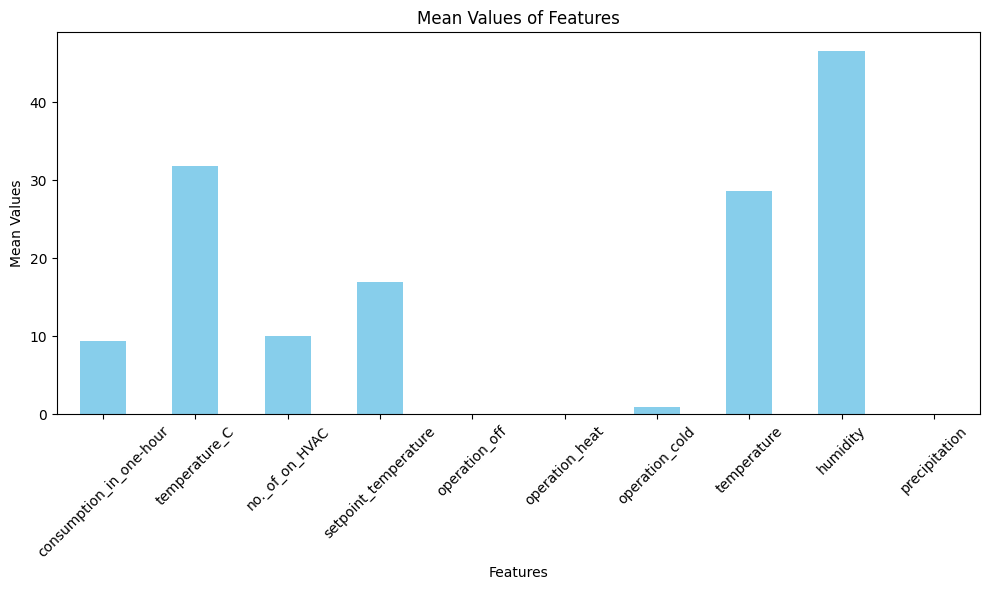

In [ ]:
features = filtered_df.columns[1:]  # Exclude Date for summary
mean_values = filtered_df[features].mean()
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.title('Mean Values of Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

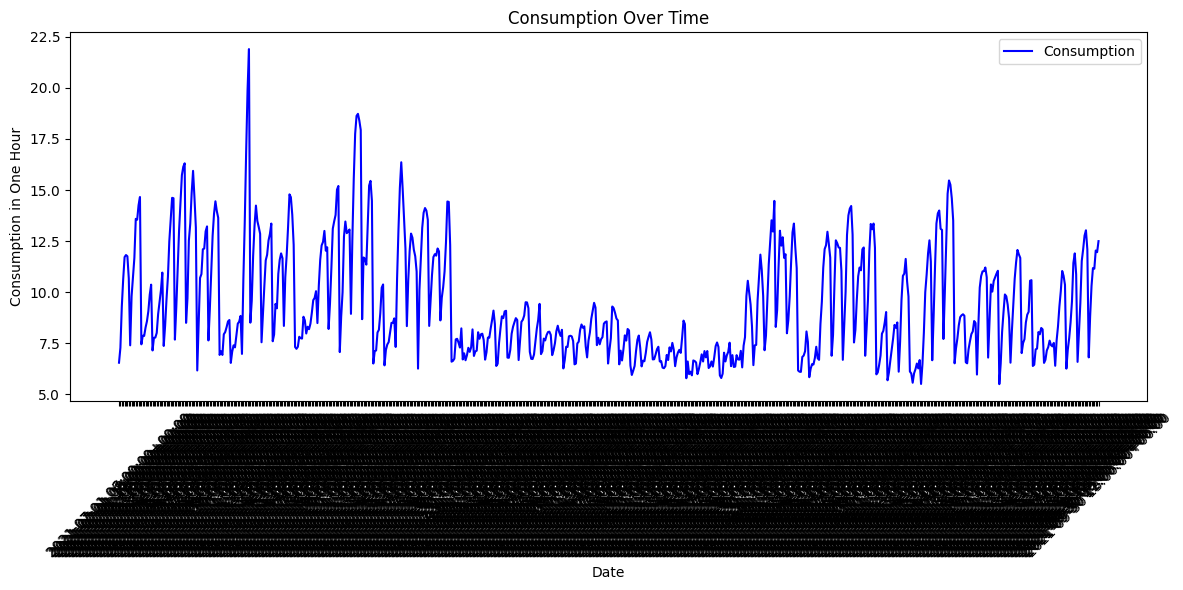

In [ ]:
#consumption over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['consumption_in_one-hour'], label='Consumption', color='blue')
plt.xlabel('Date')
plt.ylabel('Consumption in One Hour')
plt.title('Consumption Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

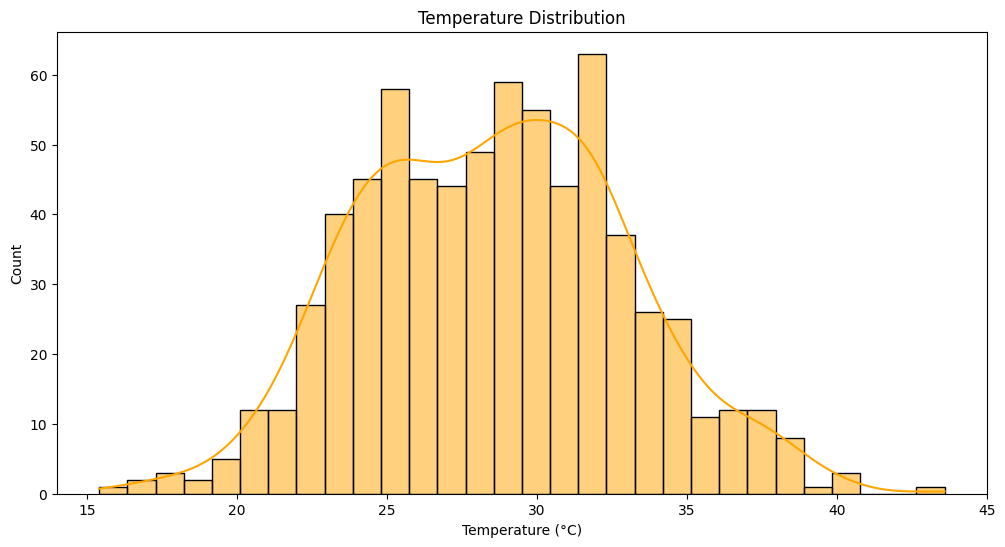

In [ ]:
#temperature distribution
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['temperature'], bins=30, kde=True, color='orange')
plt.xlabel('Temperature (°C)')
plt.title('Temperature Distribution')
plt.show()


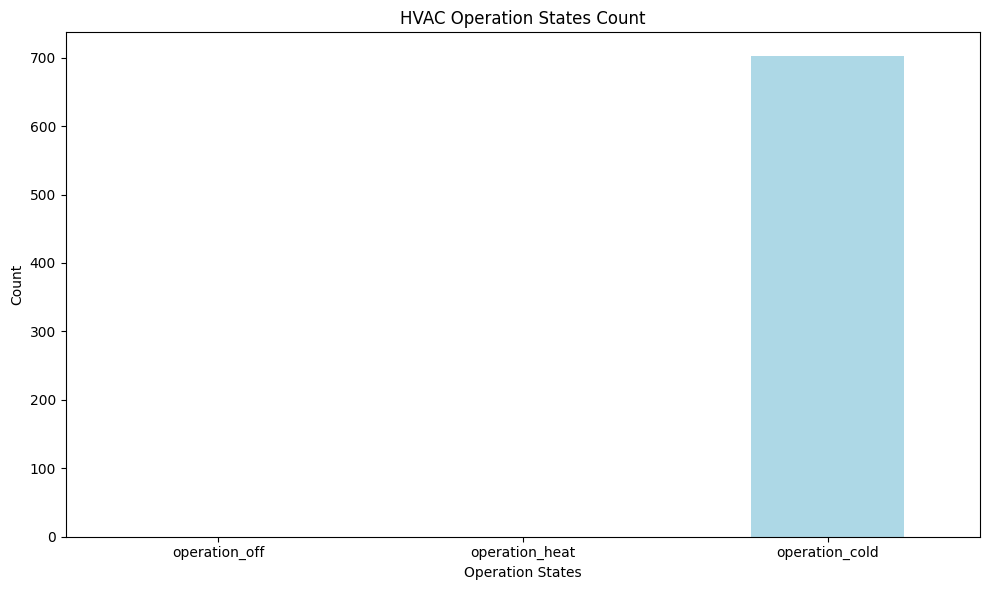

In [ ]:
# Bar plot for number of HVAC states
hvac_states = filtered_df[['operation_off', 'operation_heat', 'operation_cold']].sum()
plt.figure(figsize=(10, 6))
hvac_states.plot(kind='bar', color=['lightgray', 'orange', 'lightblue'])
plt.title('HVAC Operation States Count')
plt.xlabel('Operation States')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

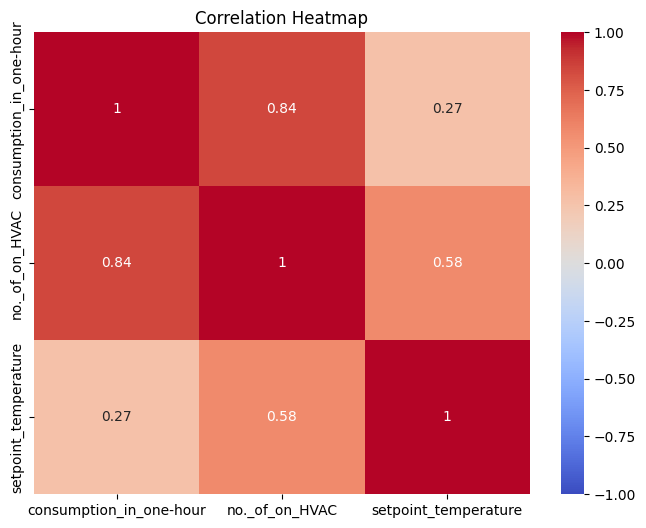

In [ ]:
columns_for_analysis = ['consumption_in_one-hour', 'no._of_on_HVAC', 'setpoint_temperature']

# Create the correlation matrix
corr_matrix = filtered_df[columns_for_analysis].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

There is a good correlation between consumption in one hour and no. of hvac

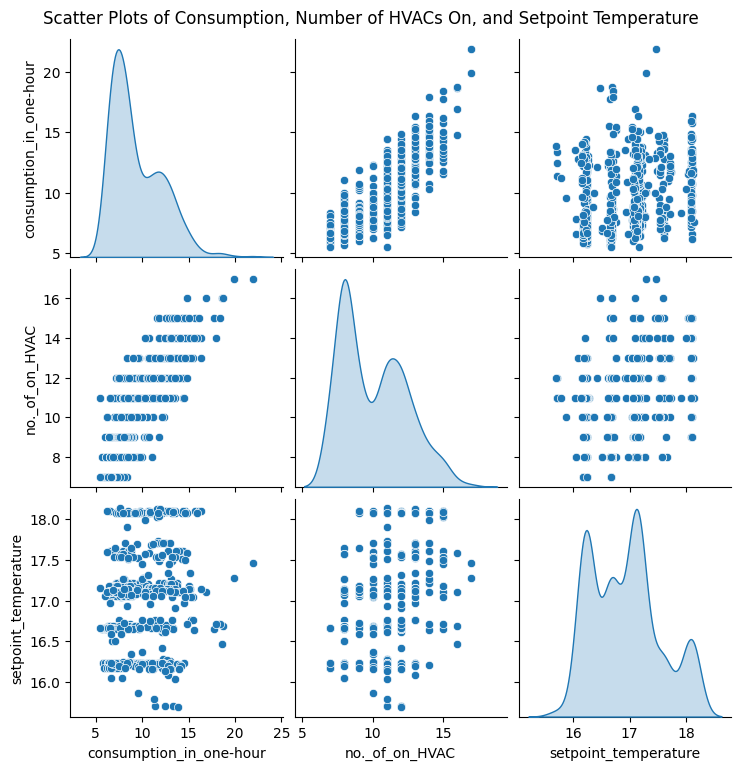

In [ ]:
import seaborn as sns

columns = ['consumption_in_one-hour', 'no._of_on_HVAC', 'setpoint_temperature']

sns.pairplot(filtered_df[columns], kind='scatter', diag_kind='kde')


plt.suptitle('Scatter Plots of Consumption, Number of HVACs On, and Setpoint Temperature', y=1.02)
plt.show()

In [ ]:
print(filtered_df.columns)

Index(['Date', 'consumption_in_one-hour', 'temperature_C', 'no._of_on_HVAC',
       'setpoint_temperature', 'operation_off', 'operation_heat',
       'operation_cold', 'temperature', 'humidity', 'precipitation'],
      dtype='object')


LSTM model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Set the Date as index
filtered_df.set_index('Date', inplace=True)

# Fill missing values
filtered_df.fillna(method='ffill', inplace=True)

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=filtered_df.columns, index=filtered_df.index)

<ipython-input-25-c5d25edfa562>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_df.fillna(method='ffill', inplace=True)


In [ ]:
print(filtered_df.head())

                           consumption_in_one-hour  temperature_C  \
Date                                                                
2021-07-01 06:00:00+00:00                     6.55      30.290732   
2021-07-01 07:00:00+00:00                     7.28      30.405854   
2021-07-01 08:00:00+00:00                     9.29      30.470000   
2021-07-01 09:00:00+00:00                    10.64      30.484634   
2021-07-01 10:00:00+00:00                    11.72      30.600488   

                           no._of_on_HVAC  setpoint_temperature  \
Date                                                              
2021-07-01 06:00:00+00:00             9.0                 18.10   
2021-07-01 07:00:00+00:00             9.0                 18.08   
2021-07-01 08:00:00+00:00            10.0                 18.08   
2021-07-01 09:00:00+00:00            11.0                 18.08   
2021-07-01 10:00:00+00:00            11.0                 17.73   

                           operation_off  oper

First we will predict the setpoint temperature

In [ ]:
features = ['operation_off', 'operation_heat', 'operation_cold', 'temperature',
            'humidity', 'precipitation']
target = 'setpoint_temperature'

# Select the necessary columns
df = filtered_df[['operation_off', 'operation_heat', 'operation_cold', 'temperature',
                  'humidity', 'precipitation', 'temperature_C', 'setpoint_temperature']]

# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)

<ipython-input-27-a80a6a556c1f>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-27-a80a6a556c1f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Split into features and target
X = scaled_data[:, :-1]  # Features (everything except 'setpoint_temperature')
y = scaled_data[:, -1]   # Target ('setpoint_temperature')

# Reshape data for LSTM [samples, time steps, features]
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Split data into training and testing sets (80-20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))  # Output layer for predicting 'setpoint_temperature'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.2702 - val_loss: 0.1234
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1214 - val_loss: 0.0239
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0980 - val_loss: 0.0291
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0885 - val_loss: 0.0234
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0790 - val_loss: 0.0180
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0665 - val_loss: 0.0159
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - val_loss: 0.0146
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0503 - val_loss: 0.0145
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - val_loss: 0.0234
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0305
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - val_loss: 0.0392
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - val_l

In [ ]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [ ]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

y_pred_inv = scaler.inverse_transform(np.concatenate((X_test.reshape(-1, X_train.shape[2]), y_pred), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((X_test.reshape(-1, X_train.shape[2]), y_test.reshape(-1, 1)), axis=1))[:, -1]
shift_value = 0.5  # Adjust this value as needed
y_pred_inv_shifted = y_pred_inv - shift_value
y_pred_inv_smoothed = moving_average(y_pred_inv, window_size=5)

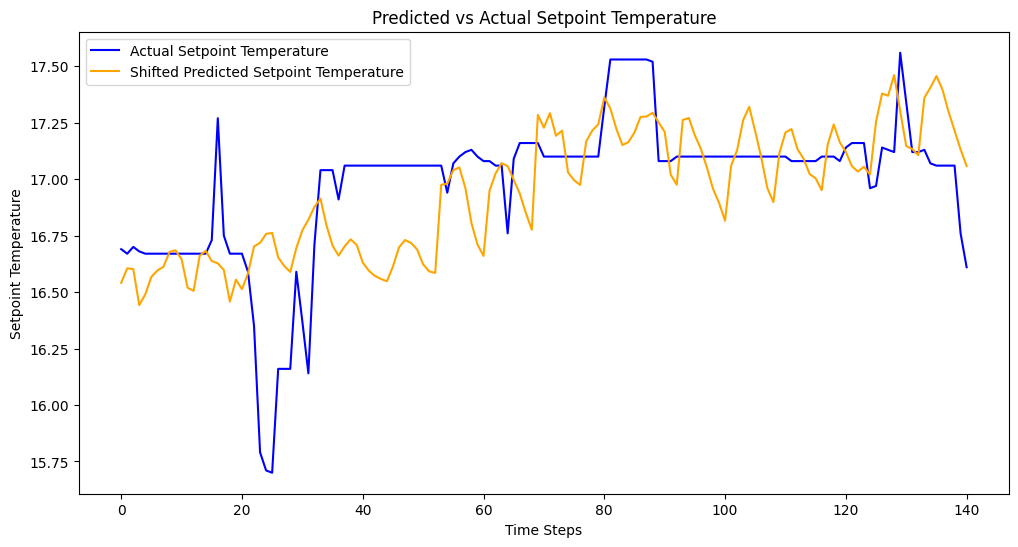

In [ ]:

# Now plot the shifted predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Setpoint Temperature', color='blue')
plt.plot(y_pred_inv_shifted, label='Shifted Predicted Setpoint Temperature', color='orange')
plt.title('Predicted vs Actual Setpoint Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Setpoint Temperature')
plt.legend()
plt.show()

We have predicted the optimal temperature.
Now using the predicted values of temperature of hvac we will see the optimal number of HVAC units

In [ ]:
# Step 1: Copy the original 'setpoint_temperature' values to newdf's 'predicted_setpoint_temp' column
newdf['predicted_setpoint_temp'] = newdf['setpoint_temperature']

# Step 2: Replace the last n values in 'setpoint_temperature' with predictions (y_pred_inv)
filtered_df.loc[filtered_df.index[-len(y_pred_inv):], 'setpoint_temperature'] = y_pred_inv
newdf.loc[newdf.index[-len(y_pred_inv):], 'predicted_setpoint_temp'] = y_pred_inv

# Display the first few rows to verify
print(newdf.head())


                           Date  dif_cons_smooth  temperature_C  \
3696  2021-07-01 06:00:00+00:00             6.55      30.290732   
3697  2021-07-01 07:00:00+00:00             7.28      30.405854   
3698  2021-07-01 08:00:00+00:00             9.29      30.470000   
3699  2021-07-01 09:00:00+00:00            10.64      30.484634   
3700  2021-07-01 10:00:00+00:00            11.72      30.600488   

      no._of_on_HVAC  setpoint_temperature  device_type  operation_off  \
3696             9.0                 18.10          0.4            0.0   
3697             9.0                 18.08          0.4            0.0   
3698            10.0                 18.08          0.5            0.0   
3699            11.0                 18.08          0.5            0.0   
3700            11.0                 17.73          0.5            0.0   

      operation_heat  operation_cold  temperature  humidity  precipitation  \
3696             0.0             1.0         22.4      76.4            0.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = ['operation_off', 'operation_heat', 'operation_cold',
            'temperature', 'humidity', 'precipitation', 'temperature_C', 'setpoint_temperature']

target = 'no._of_on_HVAC'

X = filtered_df[features]
y = filtered_df[target]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)

rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
print(f'Random Forest RMSE: {rmse_rf}')


Random Forest RMSE: 1.2245155359865143


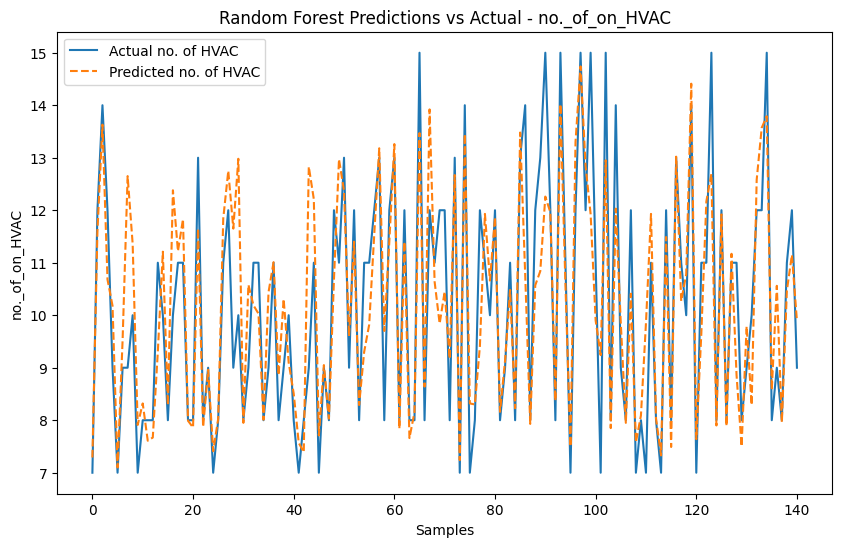

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test_rf.values, label='Actual no. of HVAC')
plt.plot(y_pred_rf, label='Predicted no. of HVAC', linestyle='--')
plt.title('Random Forest Predictions vs Actual - no._of_on_HVAC')
plt.xlabel('Samples')
plt.ylabel('no._of_on_HVAC')
plt.legend()
plt.show()

We have predicted the no. of HVAC that need to be on
Now we will predict the energy consumption

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
newdf['predicted_no._of_on_HVAC'] = newdf['no._of_on_HVAC']

filtered_df.loc[filtered_df.index[-len(y_pred_inv):], 'setpoint_temperature'] = y_pred_inv
filtered_df.loc[filtered_df.index[-len(y_pred_rf):], 'no._of_on_HVAC'] = y_pred_rf
newdf.loc[newdf.index[-len(y_pred_rf):], 'predicted_no._of_on_HVAC'] = y_pred_rf

newdf.head()

,Date,dif_cons_smooth,temperature_C,no._of_on_HVAC,setpoint_temperature,device_type,operation_off,operation_heat,operation_cold,temperature,humidity,precipitation,predicted_setpoint_temp,predicted_no._of_on_HVAC
3696,2021-07-01 06:00:00+00:00,6.55,30.290732,9.0,18.10,0.4,0.0,0.0,1.0,22.4,76.4,0.0,18.10,9.0
3697,2021-07-01 07:00:00+00:00,7.28,30.405854,9.0,18.08,0.4,0.0,0.0,1.0,24.2,66.9,0.0,18.08,9.0
3698,2021-07-01 08:00:00+00:00,9.29,30.470000,10.0,18.08,0.5,0.0,0.0,1.0,25.2,61.2,0.0,18.08,10.0
3699,2021-07-01 09:00:00+00:00,10.64,30.484634,11.0,18.08,0.5,0.0,0.0,1.0,27.2,52.8,0.0,18.08,11.0
3700,2021-07-01 10:00:00+00:00,11.72,30.600488,11.0,17.73,0.5,0.0,0.0,1.0,29.4,42.8,0.0,17.73,11.0


In [ ]:
X = filtered_df[['setpoint_temperature', 'no._of_on_HVAC', 'operation_off', 'operation_heat',
                 'operation_cold', 'temperature', 'humidity', 'precipitation', 'temperature_C']]
y = filtered_df['consumption_in_one-hour']

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_energy = model.predict(X_test)

# Calculate RMSE and R^2 score for evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_energy))
r2 = r2_score(y_test, y_pred_energy)
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

RMSE: 3.558944253470426
R^2 Score: -1.3032040310933746


In [ ]:
print(y_pred_energy)

[ 5.41430785 10.60169799 13.18007271  9.74285517  9.1414455   4.62892285
  7.66195422 11.42908909  9.92225319  5.93240322  6.76853316  6.32965141
  6.42243258  6.62500092  9.03360005  5.89678094 11.31467512 10.52120619
 11.60160527  6.94160672  6.78965261  9.5577228   5.01232101  6.58575437
  4.97863905  6.03866478 11.24983111 12.48171417 11.19531562 11.01619897
  5.23035306  8.39371285  8.13894452  8.25707343  6.19395102  9.41262441
 10.37009285  5.65166736  7.83244353  6.74876198  6.47628056  5.81992011
  6.04937985 12.91863106 12.29334283  4.16390071  6.14361925  5.3500078
  9.11363584 12.10833924 11.49511924  8.32408575 10.58968438  4.65596146
  6.18722452  6.99803531  9.29209887 11.69795439  7.90885756 10.27385262
 12.52942291  3.88467896  8.17029065  3.92192306  4.60117863 11.07004904
  5.48708782 12.15768553  8.42131355  5.76519428  6.79751428  5.31447266
  9.80286692  3.56602799 11.47534429  5.42427983  5.47919831  5.79671323
  8.98696957  7.64117836  9.16942499  5.00646724  6.

In [ ]:
print(filtered_df['consumption_in_one-hour'])

Date
2021-07-01 06:00:00+00:00     6.55
2021-07-01 07:00:00+00:00     7.28
2021-07-01 08:00:00+00:00     9.29
2021-07-01 09:00:00+00:00    10.64
2021-07-01 10:00:00+00:00    11.72
                             ...  
2021-09-30 09:00:00+00:00    11.18
2021-09-30 10:00:00+00:00    11.15
2021-09-30 11:00:00+00:00    12.04
2021-09-30 12:00:00+00:00    11.96
2021-09-30 13:00:00+00:00    12.50
Name: consumption_in_one-hour, Length: 702, dtype: float64


In [ ]:
newdf['pred_energy_consumption'] = newdf['dif_cons_smooth']  # Initialize with existing setpoint_temperature values
newdf.loc[newdf.index[-len(y_pred_energy):], 'pred_energy_consumption'] = y_pred_energy  # Replace last n values
print(newdf.head())


                           Date  dif_cons_smooth  temperature_C  \
3696  2021-07-01 06:00:00+00:00             6.55      30.290732   
3697  2021-07-01 07:00:00+00:00             7.28      30.405854   
3698  2021-07-01 08:00:00+00:00             9.29      30.470000   
3699  2021-07-01 09:00:00+00:00            10.64      30.484634   
3700  2021-07-01 10:00:00+00:00            11.72      30.600488   

      no._of_on_HVAC  setpoint_temperature  device_type  operation_off  \
3696             9.0                 18.10          0.4            0.0   
3697             9.0                 18.08          0.4            0.0   
3698            10.0                 18.08          0.5            0.0   
3699            11.0                 18.08          0.5            0.0   
3700            11.0                 17.73          0.5            0.0   

      operation_heat  operation_cold  temperature  humidity  precipitation  \
3696             0.0             1.0         22.4      76.4            0.0

In [ ]:
# Exporting filtered_df to an Excel file
#newdf.to_excel('newdf.xlsx', index=False)
newdf.head()

,Date,dif_cons_smooth,temperature_C,no._of_on_HVAC,setpoint_temperature,device_type,operation_off,operation_heat,operation_cold,temperature,humidity,precipitation,predicted_setpoint_temp,predicted_no._of_on_HVAC,pred_energy_consumption
3696,2021-07-01 06:00:00+00:00,6.55,30.290732,9.0,18.10,0.4,0.0,0.0,1.0,22.4,76.4,0.0,18.10,9.0,6.55
3697,2021-07-01 07:00:00+00:00,7.28,30.405854,9.0,18.08,0.4,0.0,0.0,1.0,24.2,66.9,0.0,18.08,9.0,7.28
3698,2021-07-01 08:00:00+00:00,9.29,30.470000,10.0,18.08,0.5,0.0,0.0,1.0,25.2,61.2,0.0,18.08,10.0,9.29
3699,2021-07-01 09:00:00+00:00,10.64,30.484634,11.0,18.08,0.5,0.0,0.0,1.0,27.2,52.8,0.0,18.08,11.0,10.64
3700,2021-07-01 10:00:00+00:00,11.72,30.600488,11.0,17.73,0.5,0.0,0.0,1.0,29.4,42.8,0.0,17.73,11.0,11.72


In [ ]:
newdf.to_excel('newdfnew.xlsx', index=False)